# Regression analysis with Python
In this demo, you will learn how to use the statsmodels package in Python to conduct regression analysis.

In [1]:
# importing neccesary packages
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
# loading the dataset
df = pd.read_csv('WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv')

In [3]:
# dimension of the dataframe(row,columns)
df.shape

(9134, 24)

In [70]:
##### returns the first five rows by default
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Engaged
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,0
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,0
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,0
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,0
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,0


In [5]:
# we are encoding those who did not respond to marketing calls (No) with a value of 0 and those who did respond (Yes) with a 
# value of 1. We are creating a new field named Engaged with these encoded values.

df['Engaged'] = df['Response'].apply(lambda x:0 if x == 'No' else 1 )

### Engagement rate
The first thing that we are going to look at is the aggregate engagement rate.
This engagement rate is simply the percentage of customers that responded to
the marketing calls

In [6]:
# we are counting the number of records (or customers) in each Engaged group with the count function by dividing by the total
# number of customers in the DataFrame and multiplying by 100.0 .

engagement_rate_df = pd.DataFrame(
df.groupby('Engaged').count()['Response'] / df.shape[0] * 100.0
)

In [7]:
# we are counting the number of records (or customers) in each Engaged group with the count function.
df.groupby('Engaged').count()['Response']

Engaged
0    7826
1    1308
Name: Response, dtype: int64

In [8]:
engagement_rate_df

,Response
Engaged,
0,85.679877
1,14.320123


In [9]:
# transposing engagement_rate_df
engagement_rate_df.T

Engaged,0,1
Response,85.679877,14.320123


### Sales channels
Now, let's see whether we can find any noticeable patterns in the sales channel and engagement. We are going to analyze how the engaged and non engaged customers are distributed among different sales channels.

In [10]:
#we are using the pivot_table function in the pandas library to group by the Sales Channel and Response variables.

import numpy as np
engagement_by_sales_channel_df = pd.pivot_table(
df, values='Response', index='Sales Channel', columns='Engaged', aggfunc= len
).fillna(0.0)

In [11]:
engagement_by_sales_channel_df

Engaged,0,1
Sales Channel,,
Agent,2811,666
Branch,2273,294
Call Center,1573,192
Web,1169,156


In [12]:
# changing the column names
engagement_by_sales_channel_df.columns = ['Not Engaged', 'Engaged']
engagement_by_sales_channel_df

,Not Engaged,Engaged
Sales Channel,,
Agent,2811,666
Branch,2273,294
Call Center,1573,192
Web,1169,156


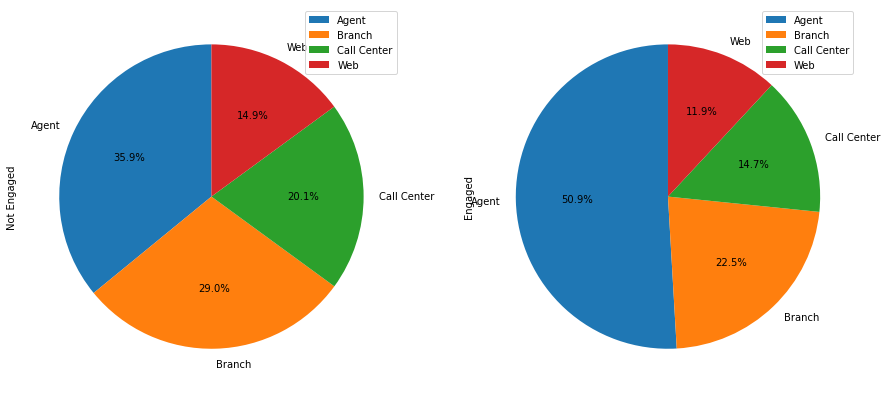

In [13]:
# using pie charts, to display distributions of engaged and non-engaged customers across different sales channels
engagement_by_sales_channel_df.plot(
kind='pie',
figsize=(15, 7),
startangle=90,
subplots=True,
autopct=lambda x: '%0.1f%%' % x
)
plt.show()

### Total claim amounts
The last thing that we are going to look at before we dive into the regression
analysis are the differences in the distributions of Total Claim Amount between
the engaged and non-engaged groups. We are going to visualize this by using
box plots.

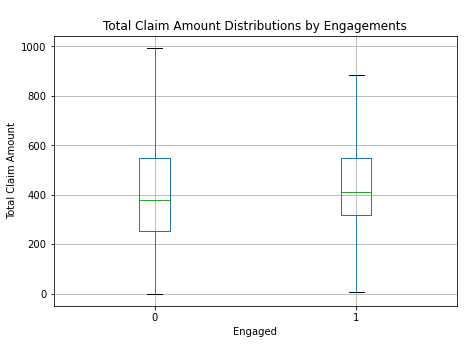

In [68]:
# The following box plots show the distributions of the Total Claim Amount between the engaged and non-engaged groups

ax = df[['Engaged', 'Total Claim Amount']].boxplot(
by='Engaged',
showfliers=False,
figsize=(7,5)
)
ax.set_xlabel('Engaged')
ax.set_ylabel('Total Claim Amount')
ax.set_title('Total Claim Amount Distributions by Engagements')
plt.suptitle(" ")
plt.show()

### Regression analysis
We will first build a
logistic regression model with continuous variables, and you'll learn how to
interpret the results. Then, we are going to discuss different ways to handle
categorical variables when fitting regression models, and what impact those
categorical variables have on the fitted logistic regression model.

#### Continuous variables

In [16]:
#  the dtype attribute of a pandas Series object tells you what type of data it contains
df['Income'].dtype

dtype('int64')

In [71]:
df['EmploymentStatus'].dtype

dtype('O')

In [73]:
# In order to take a quick look at the distributions of variables with numerical values, you can also do the following
df.describe().count()

Customer Lifetime Value          8
Income                           8
Monthly Premium Auto             8
Months Since Last Claim          8
Months Since Policy Inception    8
Number of Open Complaints        8
Number of Policies               8
Total Claim Amount               8
Engaged                          8
dtype: int64

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [34]:
# We are going to store this list of the names of continuous variables in a separate variable, named continuous_vars.
continuous_vars = [
'Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
'Months Since Last Claim', 'Months Since Policy Inception',
'Number of Open Complaints', 'Number of Policies',
'Total Claim Amount'
]


In [35]:
# importing the statsmodel package

import statsmodels.api as sm

In [36]:
# code to initiate a logistic regression model

logit = sm.Logit(
df['Engaged'],
df[continuous_vars]
)

In [37]:
# Once a logistic regression object is created with the output and input variables defined, we can train or fit this model by 
# using the following code

logit_fit = logit.fit()

Optimization terminated successfully.
         Current function value: 0.421189
         Iterations 6


In [38]:
# In order to get a detailed description of the trained model, you can use the following code
logit_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Engaged   No. Observations:                 9134
Model:                          Logit   Df Residuals:                     9126
Method:                           MLE   Df Model:                            7
Date:                Wed, 11 May 2022   Pseudo R-squ.:                -0.02546
Time:                        11:56:33   Log-Likelihood:                -3847.1
converged:                       True   LL-Null:                       -3751.6
Covariance Type:            nonrobust   LLR p-value:                     1.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Customer Lifetime Value       -6.741e-06   5.04e-06     -1.337      0.181   -1.66e-05    3.14e-06
Income                        -2.857e-06   1.03e-06     -2.766      0.006   -4.88e-06   -8.33e-07
Monthly Premium Auto             -0.0084      0.001     -6.889      0.000      -0.011      -0.006
Months Since Last Claim          -0.0202      0.003     -7.238      0.000      -0.026      -0.015
Months Since Policy Inception    -0.0060      0.001     -6.148      0.000      -0.008      -0.004
Number of Open Complaints        -0.0829      0.034     -2.424      0.015      -0.150      -0.016
Number of Policies               -0.0810      0.013     -6.356      0.000      -0.106      -0.056
Total Claim Amount                0.0001      0.000      0.711      0.477      -0.000       0.000
=================================================================================================
"""

Let's take a closer look at this model output. coef represents the coefficients
for each of the input variables, and z represents the z-score, which is the
number of standard deviations from the mean. 

The P>|z| column represents the p-value, which means how likely it is to observe the relationship between the
feature and the output variable by chance. So, the lower the value of P>|z| is,
the more likely it is that the relationship between the given feature and the
output variable is strong and is not by chance. 

Typically, 0.05 is a good cut-off point for the p-value, and any value less than 0.05 signifies a strong
relationship between the given feature and the output variable.

#### Categorical variables

In [39]:
# In Python, there are multiple ways to handle categorical variables
# when using the pandas package. Let's first look at factorizing categorical
# variables, as shown in the following code

gender_values, gender_labels = df['Gender'].factorize()

In [40]:
gender_values

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [41]:
gender_labels

Index(['F', 'M'], dtype='object')

In [53]:
# The following code shows another way to encode categorical variables with
# orderings when using pandas

Categories = pd.Categorical(
df['Education'],
categories=['High School or Below', 'Bachelor', 'College', 'Master', 'Doctor']
)


In [66]:
Categories

['Bachelor', 'Bachelor', 'Bachelor', 'Bachelor', 'Bachelor', ..., 'Bachelor', 'College', 'Bachelor', 'College', 'College']
Length: 9134
Categories (5, object): ['High School or Below', 'Bachelor', 'College', 'Master', 'Doctor']

In [64]:
Categories.codes

array([1, 1, 1, ..., 1, 2, 2], dtype=int8)

In [45]:
# We will now add these encoded variables to the pandas DataFrame, df, as
# shown in the following code

df['GenderFactorized'] = gender_values
df['EducationFactorized'] = categories.codes

In [48]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Engaged,GenderFactorized,EducationFactorized
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,0,0,1
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,0,0,1
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,0,0,1
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,0,1,1
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,0,1,1


In [47]:
# With these encodings for the two categorical variables, Gender and Education, we
# can now fit a logistic regression model using the following code

logit = sm.Logit(
df['Engaged'],
df[[
'GenderFactorized',
'EducationFactorized'
]]
)
logit_fit = logit.fit()

Optimization terminated successfully.
         Current function value: 0.493068
         Iterations 6


In [49]:
logit_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Engaged   No. Observations:                 9134
Model:                          Logit   Df Residuals:                     9132
Method:                           MLE   Df Model:                            1
Date:                Mon, 09 May 2022   Pseudo R-squ.:                 -0.2005
Time:                        13:54:17   Log-Likelihood:                -4503.7
converged:                       True   LL-Null:                       -3751.6
Covariance Type:            nonrobust   LLR p-value:                     1.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
GenderFactorized       -1.1266      0.047    -24.116      0.000      -1.218      -1.035
EducationFactorized    -0.6256      0.021    -29.900      0.000      -0.667      -0.585
=======================================================================================
"""

#### Combining continuous and categorical variables


In [50]:
# We can fit a logistic regression model by using both categorical and
# continuous variables, as shown in the following code

logit = sm.Logit(
df['Engaged'],
df[['Customer Lifetime Value',
'Income',
'Monthly Premium Auto',
'Months Since Last Claim',
'Months Since Policy Inception',
'Number of Open Complaints',
'Number of Policies',
'Total Claim Amount',
'GenderFactorized',
'EducationFactorized'
]]
)
logit_fit = logit.fit()

Optimization terminated successfully.
         Current function value: 0.420810
         Iterations 6


In [51]:
logit_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Engaged   No. Observations:                 9134
Model:                          Logit   Df Residuals:                     9124
Method:                           MLE   Df Model:                            9
Date:                Mon, 09 May 2022   Pseudo R-squ.:                -0.02454
Time:                        14:10:16   Log-Likelihood:                -3843.7
converged:                       True   LL-Null:                       -3751.6
Covariance Type:            nonrobust   LLR p-value:                     1.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Customer Lifetime Value       -6.909e-06   5.03e-06     -1.373      0.170   -1.68e-05    2.96e-06
Income                         -2.59e-06   1.04e-06     -2.494      0.013   -4.63e-06   -5.55e-07
Monthly Premium Auto             -0.0081      0.001     -6.526      0.000      -0.011      -0.006
Months Since Last Claim          -0.0194      0.003     -6.858      0.000      -0.025      -0.014
Months Since Policy Inception    -0.0057      0.001     -5.827      0.000      -0.008      -0.004
Number of Open Complaints        -0.0813      0.034     -2.376      0.017      -0.148      -0.014
Number of Policies               -0.0781      0.013     -6.114      0.000      -0.103      -0.053
Total Claim Amount                0.0001      0.000      0.943      0.346      -0.000       0.000
GenderFactorized                 -0.1500      0.058     -2.592      0.010      -0.263      -0.037
EducationFactorized              -0.0070      0.027     -0.264      0.792      -0.059       0.045
=================================================================================================
"""